## Importing Necessary Libraries
---



---



In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from joblib import dump
warnings.filterwarnings('ignore')

## Load preprocessed data
---



---


In [4]:
X_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_train.pkl")
X_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_test.pkl")
y_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_train.pkl")
y_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_test.pkl")
X = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X.pkl")
y = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y.pkl")    

# Define the parameter range for 
---



---

In [5]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50]
}

## Custom scorer for grid search
---



---

In [6]:
f1_scorer = make_scorer(f1_score, average='weighted')

## Instantiate the grid search model with StratifiedKFold``
---



---

In [7]:
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=strat_k_fold, scoring=f1_scorer, verbose=2, n_jobs=-1)


## Fit the grid search to the data
---



---

In [8]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=2, weights=uniform; 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estima

[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=23, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=24, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=28, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=24, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=29, weights=uniform; total time=   0.0s
[CV] END

/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versio

[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=27, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=21, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=30, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=24, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=30, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=21, weights=distance; total time=   0.0s
[CV

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estima

[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=22, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=29, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=12, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=30, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=16, weights=distance; total time=   0.0s
[CV] 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estima

[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=27, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=27, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=27, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=27, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=14, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=13, weights=distance; total time=   0.1s
[CV] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=18, weights=distance; total time=   0.0s
[CV] E

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estima

[CV] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=24, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=24, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=28, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=24, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=24, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=28, weights=distance; total time=   0.0s
[CV] EN

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estima

[CV] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=30, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=27, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=30, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=30, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=28, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=26, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=30, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estima

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, average=weighted), verbose=2)

## Get the best parameters
---



---

In [15]:
# Get the best parameters
best_params = grid_search.best_params_


##  Train the classifier with the best parameters
---



---

In [16]:
# Train the classifier with the best parameters
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                     n_neighbors=4, weights='distance')

## Make predictions
---



---


In [17]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

## Evaluation metrics calculations
---



---


In [18]:
# Calculate accuracy, f1-score
knn_accuracy_test = accuracy_score(y_test, y_pred_test_knn) * 100
knn_accuracy_train = accuracy_score(y_train, y_pred_train_knn) * 100
knn_f1 = f1_score(y_test, y_pred_test_knn, average='weighted') * 100
knn_accuracy_overall = (knn_accuracy_test + knn_accuracy_train) / 2

# Create a dictionary to store different metrics
metrics_dict_knn = {
    "Model": ["K-Nearest Neighbors"],
    "Train Accuracy": [f"{knn_accuracy_train:.3f}%"],
    "Test Accuracy": [f"{knn_accuracy_test:.3f}%"],
    "Overall Accuracy": [f"{knn_accuracy_overall:.3f}%"],
    "F1-Score": [f"{knn_f1:.3f}%"],
}
# Convert the dictionary to a DataFrame
metrics_df_knn = pd.DataFrame(metrics_dict_knn)

# Print the results
print("\nK-Nearest Neighbors Metrics:")
print(tabulate(metrics_df_knn, headers='keys', tablefmt='fancy_grid', showindex=False))


# Save the DataFrame to a CSV file
metrics_df_knn.to_csv("/Users/pranavkhot/Documents/Fetal Health Project/results/KNN/knn_metrics.csv", index=False)



K-Nearest Neighbors Metrics:
╒═════════════════════╤══════════════════╤═════════════════╤════════════════════╤════════════╕
│ Model               │ Train Accuracy   │ Test Accuracy   │ Overall Accuracy   │ F1-Score   │
╞═════════════════════╪══════════════════╪═════════════════╪════════════════════╪════════════╡
│ K-Nearest Neighbors │ 99.882%          │ 94.131%         │ 97.007%            │ 94.123%    │
╘═════════════════════╧══════════════════╧═════════════════╧════════════════════╧════════════╛


## Classification report
---



---


In [19]:
# Print the classification report
class_names = ['Normal', 'Suspect', 'Pathologic']
report = classification_report(y_test, y_pred_test_knn, output_dict=True, target_names=class_names)
df_report = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(tabulate(df_report, headers='keys', tablefmt='fancy_grid'))
print("\n")


Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤════════════╕
│              │   precision │   recall │   f1-score │    support │
╞══════════════╪═════════════╪══════════╪════════════╪════════════╡
│ Normal       │    0.972892 │ 0.972892 │   0.972892 │ 332        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Suspect      │    0.810345 │ 0.79661  │   0.803419 │  59        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Pathologic   │    0.861111 │ 0.885714 │   0.873239 │  35        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ accuracy     │    0.941315 │ 0.941315 │   0.941315 │   0.941315 │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ macro avg    │    0.881449 │ 0.885072 │   0.883183 │ 426        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ weighted avg │    0.941195 │ 0.941315 │   0.941233 │ 426        │
╘══════════════╧════════

## Confusion Matrix
---



---


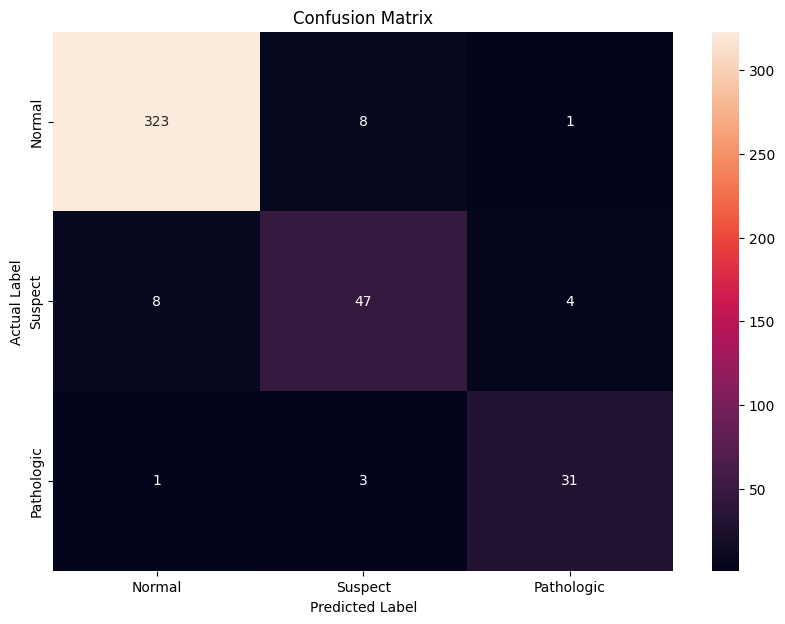

In [20]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_knn)

# Convert the confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print("\n")

## Learning Curve
---



---


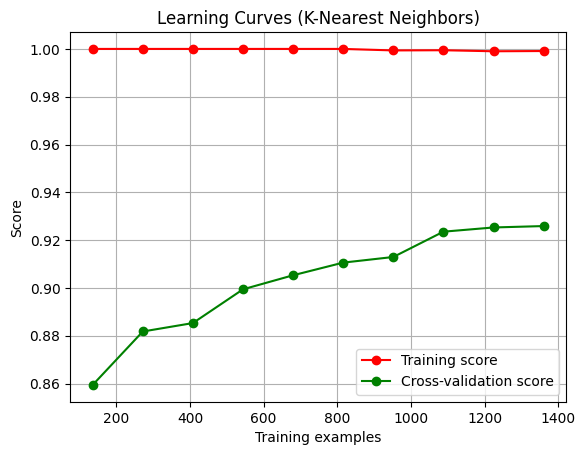

In [13]:
# Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=strat_k_fold)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves (K-Nearest Neighbors)")
plt.legend(loc="best")
plt.grid()
plt.show()


## Save the model to a file
___
___

In [21]:
import pickle

# Save the trained model to a file
with open('/Users/pranavkhot/Documents/Fetal Health Project/trained_models/best_knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

print("Model trained and saved to file.")

Model trained and saved to file.
